In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [348]:
titanic_csv = '../DATA/titanic_train.csv'
titanic = pd.read_csv('C:/Users/Perrine Mignot/Downloads/titanic.csv')

Exploring data

In [349]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [350]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data Cleaning

In [351]:
# wealthier passengers in the higher classes tend to be older, which makes sense. We’ll use these average age values to impute based on Pclass for Age.

In [352]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        else:
            return 24
    else:
         return Age

In [353]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

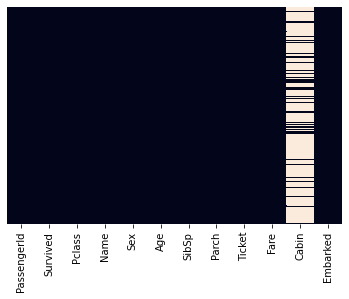

In [354]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False)

In [355]:
# Great! Let’s go ahead and drop the Cabin column.

In [356]:
titanic.drop('Cabin',axis=1,inplace=True)

In [357]:
titanic['Embarked'].fillna('S') 

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

Converting Categorical Features

In [358]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Here, we are dummying the sex and embark columns. After dummying, we will drop the rest of the columns which are not needed. (sex and embarked aren't needed as they are the original ones)

In [359]:
import pandas as pd
from category_encoders import TargetEncoder

In [360]:
titanic.groupby(['Embarked'])['Survived'].value_counts(normalize=True) * 100

Embarked  Survived
C         1           55.357143
          0           44.642857
Q         0           61.038961
          1           38.961039
S         0           66.304348
          1           33.695652
Name: Survived, dtype: float64

In [361]:
encoder = TargetEncoder()
titanic['Embarked_Encoded'] = encoder.fit_transform(titanic['Embarked'], titanic['Survived'])

In [362]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_Encoded
373,374,0,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,C,0.553571
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,S,0.336957
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,C,0.553571
336,337,0,1,"Pears, Mr. Thomas Clinton",male,29.0,1,0,113776,66.6000,S,0.336957
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,C,0.553571


In [363]:
sex = pd.get_dummies(titanic['Sex'])

In [364]:
titanic = pd.concat([titanic,sex],axis=1)

In [365]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_Encoded,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0.336957,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.553571,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.336957,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.336957,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.336957,0,1


In [366]:
titanic.drop(['Name','Ticket','Embarked','Sex'],axis=1,inplace=True)

In [368]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Encoded,female,male
0,1,0,3,22.0,1,0,7.2500,0.336957,0,1
1,2,1,1,38.0,1,0,71.2833,0.553571,1,0
2,3,1,3,26.0,0,0,7.9250,0.336957,1,0
3,4,1,1,35.0,1,0,53.1000,0.336957,1,0
4,5,0,3,35.0,0,0,8.0500,0.336957,0,1


Test Train Split

In [369]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived',axis=1), titanic['Survived'], test_size=0.30)                

Training and Predicting

In [371]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=5000)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

Evaluation

In [372]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       158
           1       0.76      0.67      0.71       110

    accuracy                           0.78       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.78      0.77       268



In [375]:
import statsmodels.api as sm

# Function to calculate VIF
def calculate_vif(data):
    vif_titanic = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_titanic.loc[i] = [x_var_names[i], vif]
    return vif_titanic.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

X=titanic.drop(['Survived'],axis=1)
calculate_vif(titanic)

,Var,Vif
9,male,4.72
8,female,4.69
2,Pclass,1.94
1,Survived,1.66
6,Fare,1.65
3,Age,1.35
5,Parch,1.32
4,SibSp,1.31
7,Embarked_Encoded,1.11
0,PassengerId,1.01


In [ ]:
# can't understand hot encoding